<a href="https://colab.research.google.com/github/kwakpovwe/kwakpovwe/blob/main/Unveiling_Sentiments_and_Topics_A_Deep_Dive_into_Kindle_Paperwhite_Reviews_through_Sentiment_Analysis_and_Text_Mining_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install pandas


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install numpy


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import re

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Import necessary library
import pandas as pd
import numpy as np

# Load the dataset (replace 'your_dataset.csv' with the actual file path and name)

DF = pd.read_csv("Product_Review_Data.csv")


In [ ]:
import pandas as pd

# Assuming 'reviews.text' is the column containing the reviews
df = pd.read_csv("Product_Review_Data.csv")  # Replace with your actual file path and name

# Check for unique reviews
unique_reviews = DF['reviews.text'].unique()

# Print or display the unique reviews
for review in unique_reviews:
    print(review)


I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cus

In [ ]:
unique_reviews_count = df['reviews.text'].nunique()
print("Number of unique reviews:", unique_reviews_count)


Number of unique reviews: 1048


In [ ]:
# EDA: Exploratory Data Analysis
# Check for missing values
print("\nMissing Values:")
print(DF.isnull().sum())


Missing Values:
id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [ ]:
# Display the first few rows of the dataset
print("Df:")
print(DF.head())


Df:
                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...  

In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(DF.describe())


Descriptive Statistics:
                ean  reviews.numHelpful  reviews.rating  reviews.userCity  \
count  8.980000e+02          900.000000     1177.000000               0.0   
mean   8.446269e+11           83.584444        4.359388               NaN   
std    3.391252e+09          197.150238        1.021445               NaN   
min    8.420000e+11            0.000000        1.000000               NaN   
25%    8.420000e+11            0.000000        4.000000               NaN   
50%    8.420000e+11            0.000000        5.000000               NaN   
75%    8.490000e+11           34.000000        5.000000               NaN   
max    8.490000e+11          997.000000        5.000000               NaN   

       reviews.userProvince  sizes           upc  
count                   0.0    0.0  8.980000e+02  
mean                    NaN    NaN  8.446269e+11  
std                     NaN    NaN  3.391252e+09  
min                     NaN    NaN  8.420000e+11  
25%                     Na

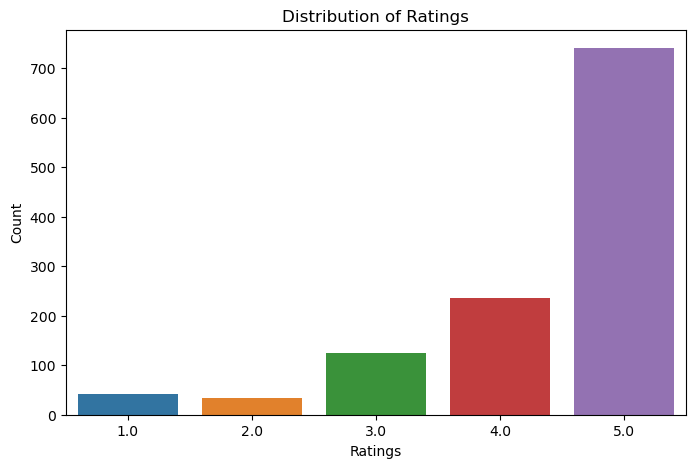

In [ ]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='reviews.rating', data=DF)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
# Print the count of each rating
rating_counts = df['reviews.rating'].value_counts()
print(rating_counts)


reviews.rating
5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: count, dtype: int64


In [ ]:
# EDA: Text Length Analysis
# Create a new column for text length
DF['text_length'] = DF['reviews.text'].apply(len)


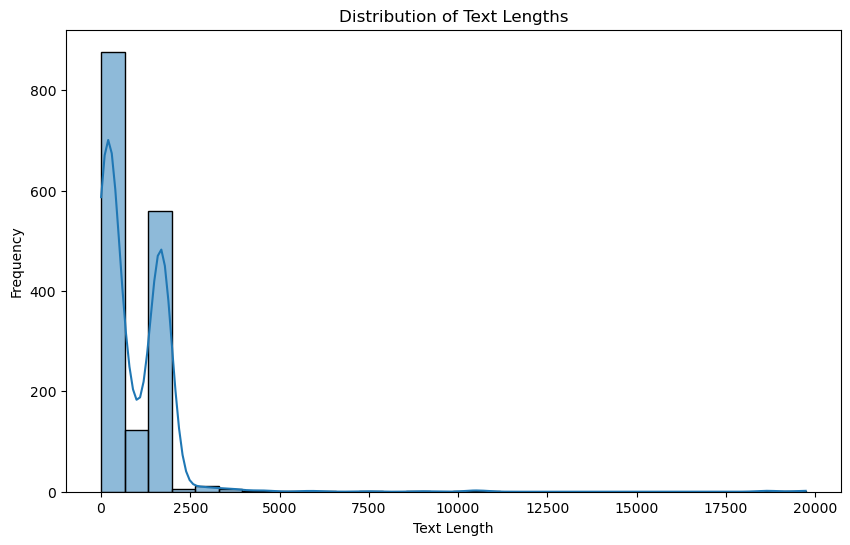

In [ ]:
# Visualize the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(DF['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Create a copy of the original DataFrame to avoid modifying the original data

import re

DF_preprocessed = DF.copy()

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming using SnowballStemmer
    snow = SnowballStemmer("english")
    stemmed_tokens = [snow.stem(word) for word in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text


In [ ]:
# Apply the preprocess_text function to the 'text' column (assuming it contains the text data)
DF_preprocessed['preprocessed_text'] = DF['reviews.text'].apply(preprocess_text)

# Display the original and preprocessed text for comparison
print("Original text:")
print(DF['reviews.text'].head())


Original text:
0    I initially had trouble deciding between the p...
1    Allow me to preface this with a little history...
2    I am enjoying it so far. Great for reading. Ha...
3    I bought one of the first Paperwhites and have...
4    I have to say upfront - I don't like coroporat...
Name: reviews.text, dtype: object


In [ ]:
print("\nPreprocessed Text:")

print(DF_preprocessed['preprocessed_text'].head())


Preprocessed Text:
0    initi troubl decid paperwhit voyag review less...
1    allow prefac littl histori casual reader own n...
2    enjoy far great read origin fire sinc 2012 fir...
3    bought one first paperwhit pleas constant comp...
4    say upfront like coropor hermet close stuff li...
Name: preprocessed_text, dtype: object


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Assuming 'DF_preprocessed' is your DataFrame with 'preprocessed_text' column
# For example: DF_preprocessed = pd.read_csv("your_preprocessed_data.csv")

# Drop NaN values in the 'preprocessed_text' column
DF_preprocessed = DF_preprocessed.dropna(subset=['preprocessed_text'])

# Tokenize the preprocessed text
tokenized_text = DF_preprocessed['preprocessed_text'].apply(word_tokenize)

# Calculate statistics for word tokens
total_tokens = tokenized_text.apply(len).sum()
unique_tokens = tokenized_text.explode().nunique()
average_token_length = tokenized_text.explode().apply(lambda x: len(str(x))).mean()

# Display statistics
print(f"Total Tokens: {total_tokens}")
print(f"Unique Tokens: {unique_tokens}")
print(f"Average Token Length: {average_token_length:.2f}")

# Token frequency distribution
token_frequency = pd.Series([token for sublist in tokenized_text for token in sublist]).value_counts()
print("\nToken Frequency Distribution:")
print(token_frequency.head(10))  # Displaying the top 10 tokens by frequency


Total Tokens: 137506
Unique Tokens: 4464
Average Token Length: 4.85

Token Frequency Distribution:
use       1804
kindl     1641
amazon    1538
like      1388
fire      1383
read      1205
devic     1000
one        993
tablet     921
sound      911
Name: count, dtype: int64


 #SENTIMENT ANALYSIS

In [ ]:
print(preprocess_text('I like this book'))
print(preprocess_text('I dont like this book'))


like book
dont like book


In [ ]:
#NLTK Sentiment Analyzer


import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('I like this book'))

print(sentiment.polarity_scores('I dont like this book'))


{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
{'neg': 0.413, 'neu': 0.587, 'pos': 0.0, 'compound': -0.2755}


In [ ]:
#Instantiate SentimentIntensityAnalyzer:

sid = SentimentIntensityAnalyzer()

In [ ]:
import pandas as pd

reviews  = pd.read_csv('Product_Review_Data.csv')


reviews.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
print(reviews)

                        id       asins   brand  \
0     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
1     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
2     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
3     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
4     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
...                    ...         ...     ...   
1592  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1593  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1594  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1595  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1596  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   

                                             categories colors  \
0                            Amazon Devices,mazon.co.uk    NaN   
1                            Amazon Devices,mazon.co.uk    NaN   
2                            Amazon Devices,mazon.co.uk    NaN   
3                            Amazon Devices,mazon.co.uk    NaN   
4                            Amazon Devices,mazon.co.uk    NaN   
...

In [ ]:
#Generate Polarity Scores:
#Use list comprehension to create new columns for each polarity score


reviews['compound'] = [sid.polarity_scores(text)['compound'] for text in reviews['reviews.text']]
reviews['positive'] = [sid.polarity_scores(text)['pos'] for text in reviews['reviews.text']]
reviews['negative'] = [sid.polarity_scores(text)['neg'] for text in reviews['reviews.text']]
reviews['neutral'] = [sid.polarity_scores(text)['neu'] for text in reviews['reviews.text']]


In [ ]:
# Calculate sentiment scores for a sample of reviews
sample_reviews = DF['reviews.text'].sample(5, random_state=42)
for review in sample_reviews:
    print(f"Review: {review}")
    print(f"Sentiment Score: {sentiment.polarity_scores(review)}")
    print()

Review: I love this handheld device especially all the items available for it. Games, books, music, etc. Glad I bought it. Thanks for having it available.
Sentiment Score: {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.8779}

Review: Updated 12/8/2014One year in...This review is for the the no-ad 64 GB wifi-only HDX 8.9.I use a Galaxy S5 Android smartphone so the HDX is for media / web surfing / offline viewing for travel. Since I had already been using Amazon Prime and Prime Music it was a no brainer for me to use the HDX to fill the role of media / web surfing on a tablet.Be informed about the download limitations to this device. Amazon has been adding clarification to this which should help would-be purchasers make a more informed opinion. This wasn't as obvious as it should have been when I ordered mine so they're listening which is good.Be aware that their most popular Prime content *may* not be available to download (and save) to your HDX. You can save certain videos to y

In [ ]:

reviews[['compound', 'positive', 'negative', 'neutral']].describe()

,compound,positive,negative,neutral
count,1597.000000,1597.000000,1597.000000,1597.000000
mean,0.704238,0.201395,0.042146,0.756451
std,0.443395,0.142262,0.046678,0.133242
min,-0.965200,0.000000,0.000000,0.000000
25%,0.659700,0.117000,0.000000,0.712000
50%,0.906200,0.168000,0.035000,0.787000
75%,0.975800,0.241000,0.068000,0.835000
max,0.999900,1.000000,0.462000,1.000000


In [ ]:
import nltk

# Download the averaged_perceptron_tagger resource
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.tokenize import sent_tokenize

# Assuming 'DF' is your DataFrame and 'reviews.text' is the column with text data
text = DF['reviews.text'].iloc[0]  # Adjust the index as needed

# Sentiment sentence extraction
sentences = sent_tokenize(text)


In [ ]:
# Step 4: Sentiment sentence extraction

from nltk.tokenize import sent_tokenize


sentences = sent_tokenize(text)

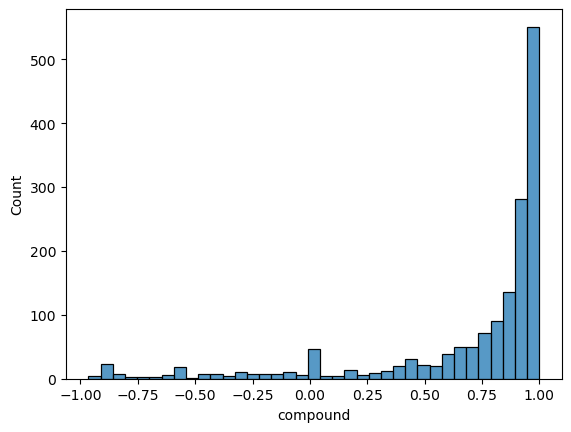

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'reviews' is the name of your DataFrame

sns.histplot(reviews['compound'])
plt.show()


<Axes: xlabel='positive', ylabel='Count'>

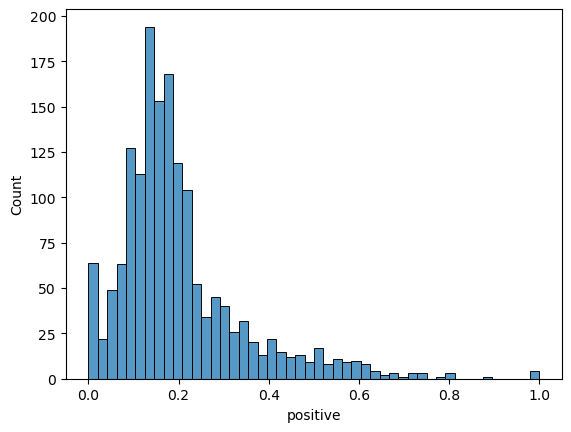

In [ ]:
#We can also take a look at the distribution of positive scores

sns.histplot(reviews['positive'])

<Axes: xlabel='negative', ylabel='Count'>

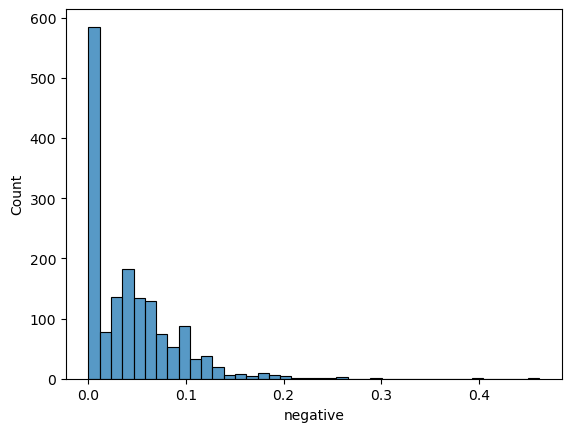

In [ ]:
#We can also take a look at the distribution of negative scores


sns.histplot(reviews['negative'])

<Axes: xlabel='neutral', ylabel='Count'>

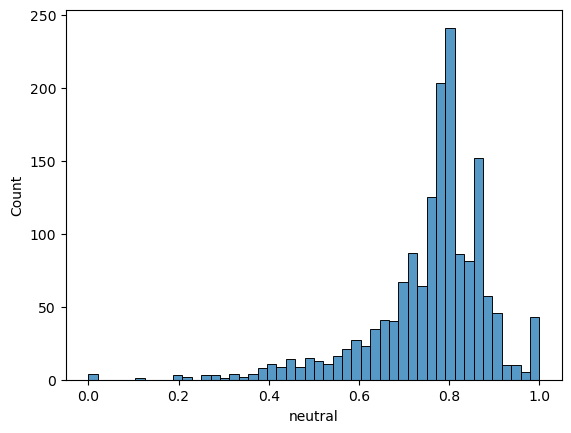

In [ ]:
#We can also take a look at the distribution of negative scores


sns.histplot(reviews['neutral'])

In [ ]:
#Lets look at how many Negative reviews we have per product


(reviews['compound']<=0).groupby(reviews['name']).sum()

name
Alexa Voice Remote for Amazon Echo and Echo Dot                   2
Alexa Voice Remote for Amazon Fire TV and Fire TV Stick           6
All-New Amazon Fire 7 Tablet Case (7th Generation                 4
All-New Amazon Fire HD 8 Tablet Case (7th Generation              4
All-New Amazon Fire TV Game Controller                            3
                                                                 ..
Kindle Paperwhite E-reader - Black                                0
Kindle Voyage E-reader                                            0
Kindle for Kids Bundle with the latest Kindle E-reader            1
Moshi Anti-Glare No Bubble Screen Protector for the Fire Phone    4
Replacement Remote for Amazon Fire TV Stick                       6
Name: compound, Length: 62, dtype: int64

In [ ]:
import pandas as pd

# Calculate as a percentage of Total Reviews
percent_negative = pd.DataFrame((reviews['compound'] <= 0).groupby(reviews['name']).sum() / reviews['name'].groupby(reviews['name']).count() * 100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews', ascending=False)

# Display the result
print(percent_negative)

                                                    % negative reviews
name                                                                  
Certified Refurbished Kindle E-reader - Black                57.142857
Certified Refurbished Fire HD 10 Tablet                      50.000000
Alexa Voice Remote for Amazon Fire TV and Fire ...           50.000000
All-New Amazon Fire TV Game Controller                       42.857143
Amazon 5W USB Official OEM Charger and Power Ad...           42.105263
...                                                                ...
Certified Refurbished Kindle Paperwhite E-reade...            0.000000
Certified Refurbished Kindle Voyage E-reader wi...            0.000000
Fire HD 10 Tablet with Alexa                                  0.000000
Fire HD 6 Tablet                                              0.000000
Certified Refurbished Echo Dot (2nd Generation)...            0.000000

[62 rows x 1 columns]


In [ ]:
#Step 4: Exploratory Data Analysis (EDA)

# Import necessary libraries for data visualization and exploration
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.probability import FreqDist

# Word Frequencies
# Assuming 'preprocessed_text' is the column containing preprocessed text
all_text = ' '.join(DF_preprocessed['preprocessed_text'])

tokens = word_tokenize(all_text)

word_freq = FreqDist(tokens)



In [ ]:
word_freq

FreqDist({'use': 1804, 'kindl': 1641, 'amazon': 1538, 'like': 1388, 'fire': 1383, 'read': 1205, 'devic': 1000, 'one': 993, 'tablet': 921, 'sound': 911, ...})

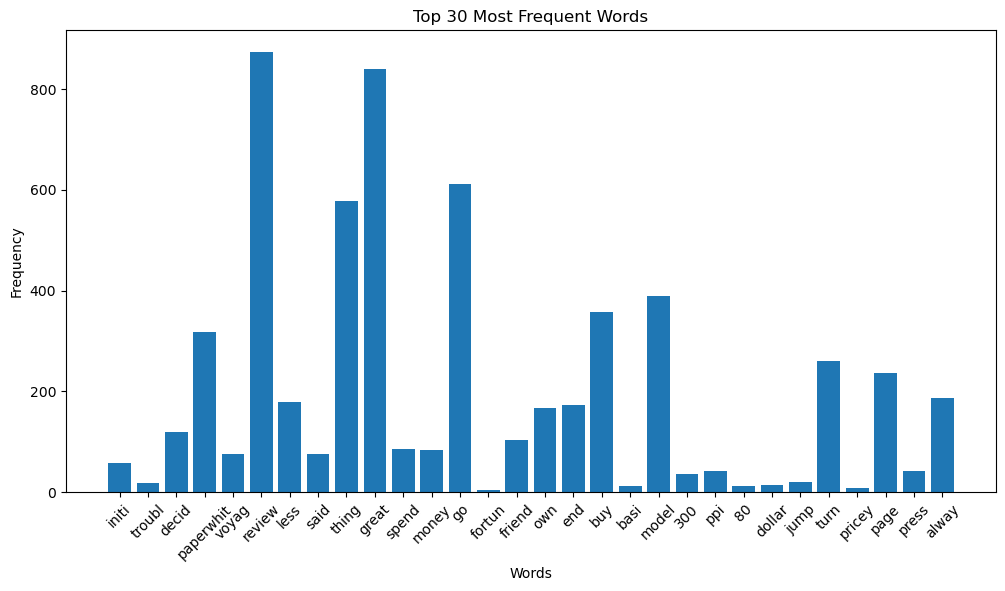

In [ ]:
# Visualize Word Frequencies
plt.figure(figsize=(12, 6))

# Bar plot of the top 30 most frequent words
plt.bar(list(word_freq.keys())[:30], list(word_freq.values())[:30])

# Customize the plot
plt.title('Top 30 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


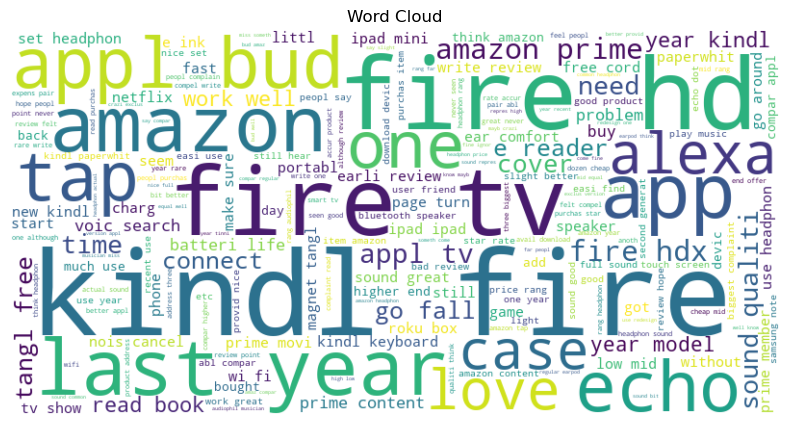

In [ ]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

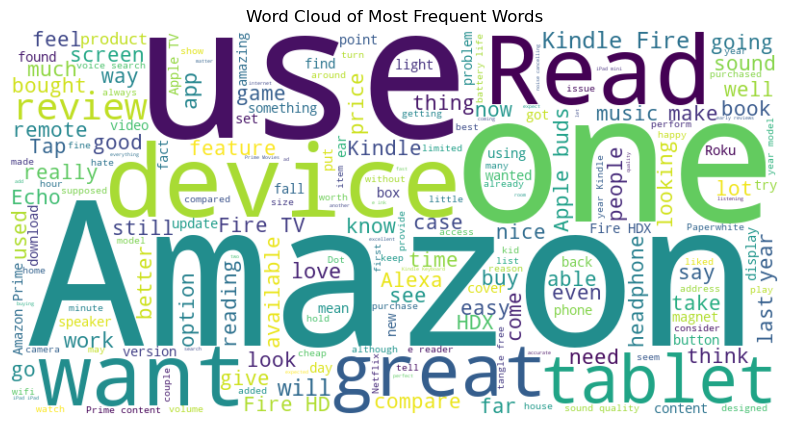

In [ ]:
# Assuming 'reviews.text' is the column containing text data
text_data = ' '.join(DF_preprocessed['reviews.text'].astype(str))

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()


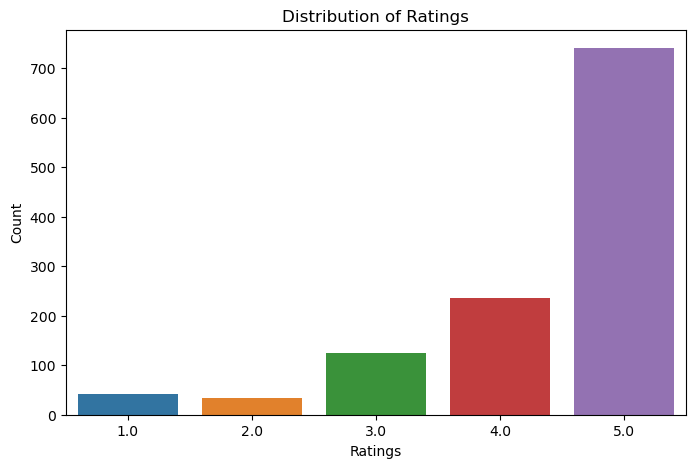

In [ ]:
# EDA: Ratings Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='reviews.rating', data=DF)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


In [ ]:
# Step 11: Feature Extraction using Bag of Words
corpus = DF['reviews.text']

count_vectorizer = CountVectorizer(max_features=1000)
X_bag_of_words = count_vectorizer.fit_transform(corpus)

X_bag_of_words_df = pd.DataFrame(X_bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())


# Display the top rows of the Bag of Words DataFrame
print("\nBag of Words DataFrame:")
print(X_bag_of_words_df.head())


Bag of Words DataFrame:
   10  100  1080p  11  12  15  16  16gb  20  2013  ...  wouldn  write  wrong  \
0   0    0      0   0   0   0   0     0   0     0  ...       0      0      0   
1   0    0      0   0   0   0   0     0   0     0  ...       0      0      0   
2   0    0      0   0   0   0   0     0   0     0  ...       0      0      0   
3   0    0      0   0   0   0   0     0   0     0  ...       0      0      0   
4   0    0      0   0   0   0   0     0   0     0  ...       0      0      0   

   year  years  yes  yet  you  your  youtube  
0     0      0    0    0    4     0        0  
1     0      1    0    0    5     0        0  
2     0      0    0    1    0     0        0  
3     0      1    0    0    3     0        0  
4     0      1    0    0    2     0        0  

[5 rows x 1000 columns]


In [ ]:
# Display the feature names for Bag of Words



print("\nBag of Words Feature Names:")
print(count_vectorizer.get_feature_names_out())


Bag of Words Feature Names:
['10' '100' '1080p' '11' '12' '15' '16' '16gb' '20' '2013' '2015' '23'
 '25' '2ghz' '30' '300' '35' '50' '99' 'ability' 'able' 'about' 'above'
 'absolutely' 'access' 'accidental' 'according' 'account' 'accurate'
 'actually' 'add' 'added' 'adding' 'addition' 'additional' 'address' 'ads'
 'after' 'again' 'ago' 'air' 'alexa' 'all' 'allow' 'allows' 'almost'
 'along' 'already' 'also' 'although' 'always' 'am' 'amazing' 'amazon'
 'ambient' 'an' 'and' 'android' 'annoying' 'another' 'answer' 'answers'
 'any' 'anything' 'anytime' 'anywhere' 'app' 'apparently' 'apple' 'apps'
 'are' 'aren' 'around' 'as' 'ask' 'aspects' 'assumption' 'at' 'audio'
 'audiophile' 'available' 'average' 'away' 'awesome' 'back' 'background'
 'bad' 'bag' 'base' 'based' 'basic' 'bass' 'batteries' 'battery' 'be'
 'because' 'been' 'before' 'being' 'below' 'best' 'better' 'between' 'big'
 'biggest' 'bit' 'black' 'block' 'blue' 'bluetooth' 'book' 'books' 'both'
 'bottom' 'bought' 'box' 'boxes' 'br' 